Filename: reprojectimg/SH_on2_LL2.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      20   (141, 11, 869)   float64   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [869E]   
Filename: reprojectimg/LH_on2_LL2.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      20   (141, 11, 880)   float64   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [880E]   


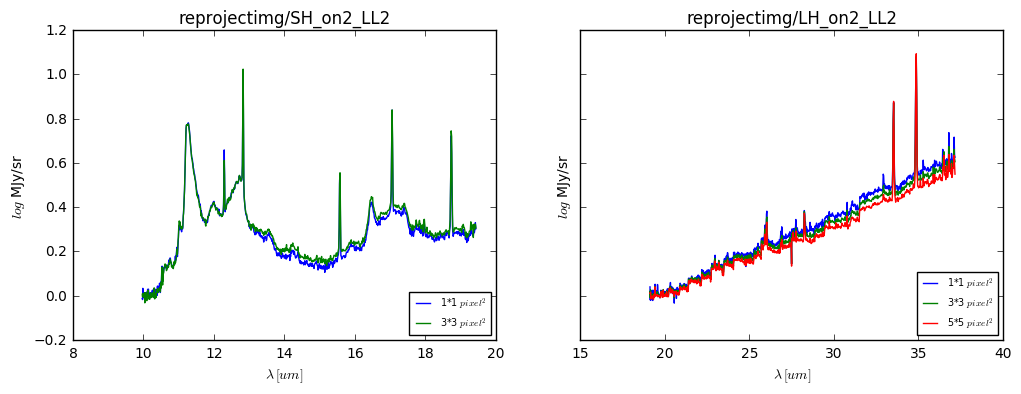

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


filename = ['reprojectimg/SH_on2_LL2.fits','reprojectimg/LH_on2_LL2.fits']
#filename = ['reprojectimg/LL1_on2_LL2.fits','reprojectimg/LL2_on2_LL2.fits',
#            'reprojectimg/SL1_on2_LL2.fits','reprojectimg/SL2_on2_LL2.fits',
#            'reprojectimg/LH_on2_LL2.fits','reprojectimg/SH_on2_LL2.fits']

#plt.figure(figsize=[20,5])
f, ax = plt.subplots(1, len(filename), figsize=[6*len(filename),4], sharey = True)
            
for num in range(0,len(filename)):
    cube = fits.open(filename[num])
    cube.info()

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
    flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
    flux_sum = flux.sum(axis=2)
    flux_sum[np.isnan(flux_sum)] = 0
    mm = flux_sum.shape
#    nn = np.argmax(flux_sum)
#    xx = (nn)//mm[1]
#    yy = (nn)%mm[1]
    xx, yy = np.where(flux_sum == np.max(flux_sum))
#    print(flux_sum[xx,yy],np.max(flux_sum))
#    print(xx,yy)
   
    wave = cube['WCS-TAB'].data[0][0]
    wave.resize(len(wave))

    flux_header = cube['PRIMARY'].header
    
#    plt.figure(figsize=[10,5])

    n = np.min([xx[0],yy[0],mm[0]-xx[0],mm[1]-yy[0]])+1
#    print(n)
    for i in range(0,n):
        flux_part = flux[xx[0]-i:xx[0]+1+i,yy[0]-i:yy[0]+1+i]
        flux_part = flux_part.mean(axis=(0,1))
        fmean = np.mean(flux_part[1:6])
        if (fmean > 1):
            ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*i+1)+'*'+str(2*i+1)+'$\ pixel^2$')
    m = np.min([xx[0],mm[0]-xx[0]])
    if(m//5>0):
        for j in range(n,m,m//5):
            flux_part = flux[xx[0]-j:xx[0]+1+i,:]
            flux_part = flux_part.mean(axis=(0,1))
            fmean = np.mean(flux_part[1:6])
            if (fmean > 0.1):
                ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*j+1)+'$\ columns$')
    else:
        for j in range(n,m,1):
            flux_part = flux[xx[0]-j:xx[0]+1+i,:]
            flux_part = flux_part.mean(axis=(0,1))
            fmean = np.mean(flux_part[1:6])
            if (fmean > 0.1):
                ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*j+1)+'$\ columns$')

#plt.xlim(32)
#    plt.ylim(-1)
    ax[num].set_title(filename[num].split('.')[0])
    ax[num].set_xlabel('$\lambda \, [um]$')
    ax[num].set_ylabel('$log\ $'+flux_header['BUNIT'])
    ax[num].legend(loc = 4,fontsize='x-small')
plt.show()


Filename: reprojectimg/SL2_on2_LL2.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      20   (141, 11, 77)   float64   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [77E]   
Filename: reprojectimg/SL1_on2_LL2.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      20   (141, 11, 117)   float64   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [117E]   


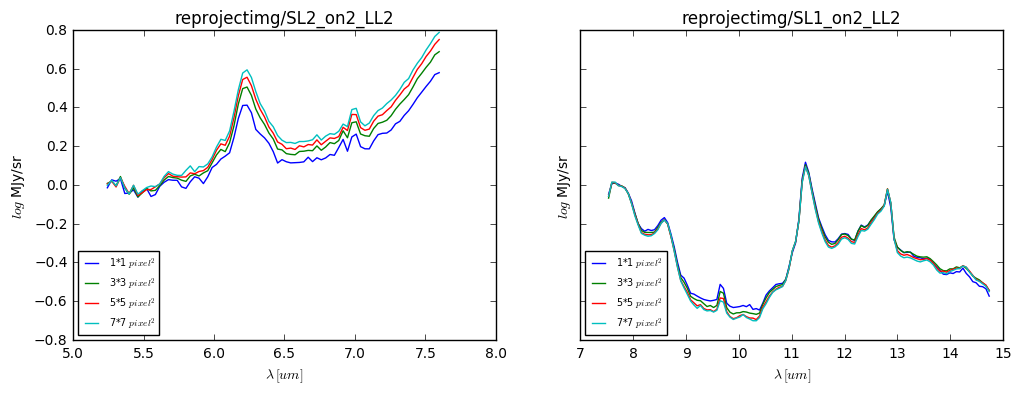

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


#filename = ['reprojectimg/SH_on2_LL2.fits','reprojectimg/LH_on2_LL2.fits']
filename = ['reprojectimg/SL2_on2_LL2.fits','reprojectimg/SL1_on2_LL2.fits']#,
#            'reprojectimg/LL2_on2_LL2.fits','reprojectimg/LL1_on2_LL2.fits']#,
#            'reprojectimg/LH_on2_LL2.fits','reprojectimg/SH_on2_LL2.fits']

#plt.figure(figsize=[20,5])
f, ax = plt.subplots(1, len(filename), figsize=[6*len(filename),4], sharey = True)
            
for num in range(0,len(filename)):
    cube = fits.open(filename[num])
    cube.info()

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
    flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
    flux_sum = flux.sum(axis=2)
    flux_sum[np.isnan(flux_sum)] = 0
    mm = flux_sum.shape
#    nn = np.argmax(flux_sum)
#    xx = (nn)//mm[1]
#    yy = (nn)%mm[1]
    xx, yy = np.where(flux_sum == np.max(flux_sum))
#    print(flux_sum[xx,yy],np.max(flux_sum))
#    print(xx,yy)
   
    wave = cube['WCS-TAB'].data[0][0]
    wave.resize(len(wave))

    flux_header = cube['PRIMARY'].header
    
#    plt.figure(figsize=[10,5])

    n = np.min([xx[0],yy[0],mm[0]-xx[0],mm[1]-yy[0]])+1
#    print(n)
    for i in range(0,n):
        flux_part = flux[xx[0]-i:xx[0]+1+i,yy[0]-i:yy[0]+1+i]
        flux_part = flux_part.mean(axis=(0,1))
        fmean = np.mean(flux_part[1:6])
        if (fmean > 1):
            ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*i+1)+'*'+str(2*i+1)+'$\ pixel^2$')
    m = np.min([xx[0],mm[0]-xx[0]])
    if(m//5>0):
        for j in range(n,m,m//5):
            flux_part = flux[xx[0]-j:xx[0]+1+i,:]
            flux_part = flux_part.mean(axis=(0,1))
            fmean = np.mean(flux_part[1:6])
            if (fmean > 0.1):
                ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*j+1)+'$\ columns$')
    else:
        for j in range(n,m,1):
            flux_part = flux[xx[0]-j:xx[0]+1+i,:]
            flux_part = flux_part.mean(axis=(0,1))
            fmean = np.mean(flux_part[1:6])
            if (fmean > 0.1):
                ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*j+1)+'$\ columns$')

#plt.xlim(32)
#    plt.ylim(-1)
    ax[num].set_title(filename[num].split('.')[0])
    ax[num].set_xlabel('$\lambda \, [um]$')
    ax[num].set_ylabel('$log\ $'+flux_header['BUNIT'])
    ax[num].legend(loc = 3,fontsize='x-small')
plt.show()


Filename: reprojectimg/LL2_on2_LL2.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      20   (141, 11, 75)   float64   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [75E]   
Filename: reprojectimg/LL1_on2_LL2.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      20   (141, 11, 99)   float64   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [99E]   


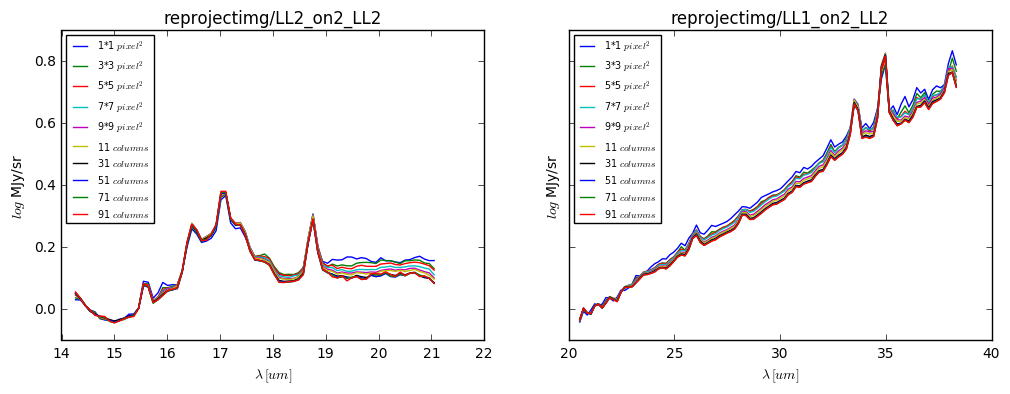

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


#filename = ['reprojectimg/SH_on2_LL2.fits','reprojectimg/LH_on2_LL2.fits']
filename = [#'reprojectimg/SL2_on2_LL2.fits','reprojectimg/SL1_on2_LL2.fits']#,
            'reprojectimg/LL2_on2_LL2.fits','reprojectimg/LL1_on2_LL2.fits']#,
#            'reprojectimg/LH_on2_LL2.fits','reprojectimg/SH_on2_LL2.fits']

#plt.figure(figsize=[20,5])
f, ax = plt.subplots(1, len(filename), figsize=[6*len(filename),4], sharey = True)
            
for num in range(0,len(filename)):
    cube = fits.open(filename[num])
    cube.info()

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
    flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
    flux_sum = flux.sum(axis=2)
    flux_sum[np.isnan(flux_sum)] = 0
    mm = flux_sum.shape
#    nn = np.argmax(flux_sum)
#    xx = (nn)//mm[1]
#    yy = (nn)%mm[1]
    xx, yy = np.where(flux_sum == np.max(flux_sum))
#    print(flux_sum[xx,yy],np.max(flux_sum))
#    print(xx,yy)
   
    wave = cube['WCS-TAB'].data[0][0]
    wave.resize(len(wave))

    flux_header = cube['PRIMARY'].header
    
#    plt.figure(figsize=[10,5])

    n = np.min([xx[0],yy[0],mm[0]-xx[0],mm[1]-yy[0]])+1
#    print(n)
    for i in range(0,n):
        flux_part = flux[xx[0]-i:xx[0]+1+i,yy[0]-i:yy[0]+1+i]
        flux_part = flux_part.mean(axis=(0,1))
        fmean = np.mean(flux_part[1:6])
        if (fmean > 1):
            ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*i+1)+'*'+str(2*i+1)+'$\ pixel^2$')
    m = np.min([xx[0],mm[0]-xx[0]])
    if(m//5>0):
        for j in range(n,m,m//5):
            flux_part = flux[xx[0]-j:xx[0]+1+i,:]
            flux_part = flux_part.mean(axis=(0,1))
            fmean = np.mean(flux_part[1:6])
            if (fmean > 0.1):
                ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*j+1)+'$\ columns$')
    else:
        for j in range(n,m,1):
            flux_part = flux[xx[0]-j:xx[0]+1+i,:]
            flux_part = flux_part.mean(axis=(0,1))
            fmean = np.mean(flux_part[1:6])
            if (fmean > 0.1):
                ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*j+1)+'$\ columns$')

#plt.xlim(32)
#    plt.ylim(-1)
    ax[num].set_title(filename[num].split('.')[0])
    ax[num].set_xlabel('$\lambda \, [um]$')
    ax[num].set_ylabel('$log\ $'+flux_header['BUNIT'])
    ax[num].legend(loc = 2,fontsize='x-small')
plt.show()

Filename: ngc4826_DR5_SL2_cube.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     272   (74, 19, 77)   float32   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [77E]   
Filename: ngc4826_DR5_SL1_cube.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     272   (74, 19, 117)   float32   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [117E]   
Filename: ngc4826_DR5_LL2_cube.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     219   (141, 11, 75)   float32   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [75E]   
Filename: ngc4826_DR5_LL1_cube.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     219   (141, 11, 99)   float32   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [99E]   


d:\python34\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in greater


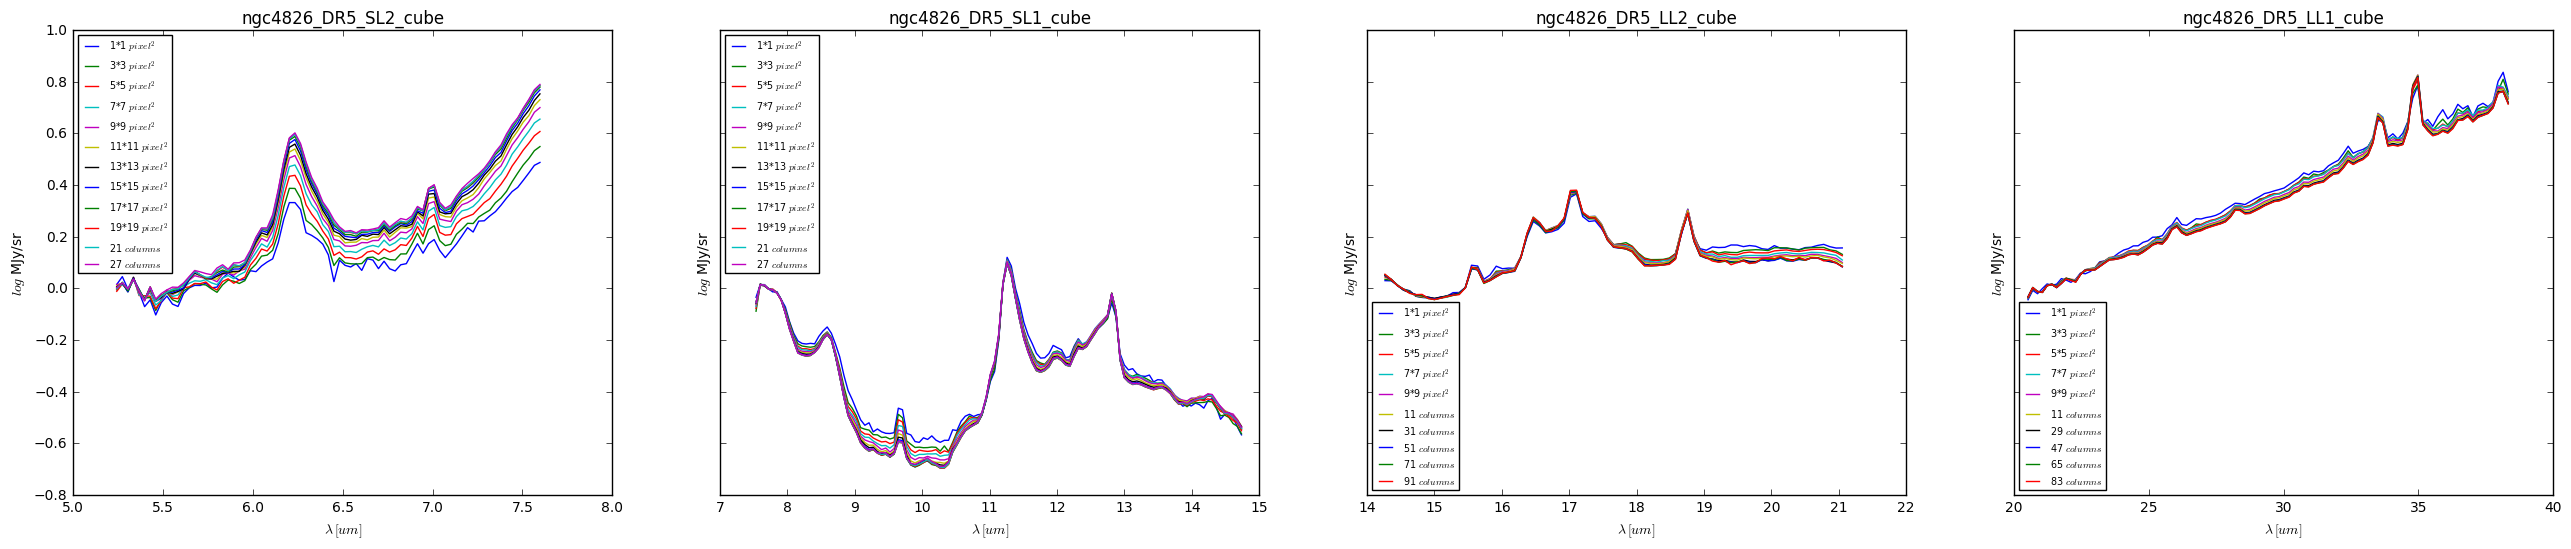

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


#filename = ['reprojectimg/SH_on2_LL2.fits','reprojectimg/LH_on2_LL2.fits']
filename = ['ngc4826_DR5_SL2_cube.fits','ngc4826_DR5_SL1_cube.fits',
            'ngc4826_DR5_LL2_cube.fits','ngc4826_DR5_LL1_cube.fits']#,
#            'ngc4826_DR5_SH_cube.fits','ngc4826_DR5_LH_cube.fits']

#plt.figure(figsize=[20,5])
f, ax = plt.subplots(1, len(filename), figsize=[8*len(filename),6], sharey = True)
            
for num in range(0,len(filename)):
    cube = fits.open(filename[num])
    cube.info()

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
    flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
    flux_sum = flux.sum(axis=2)
    flux_sum[np.isnan(flux_sum)] = 0
    mm = flux_sum.shape
#    nn = np.argmax(flux_sum)
#    xx = (nn)//mm[1]
#    yy = (nn)%mm[1]
    xx, yy = np.where(flux_sum == np.max(flux_sum))
#    print(flux_sum[xx,yy],np.max(flux_sum))
#    print(xx,yy)
   
    wave = cube['WCS-TAB'].data[0][0]
    wave.resize(len(wave))

    flux_header = cube['PRIMARY'].header
    
#    plt.figure(figsize=[10,5])

    n = np.min([xx[0],yy[0],mm[0]-xx[0],mm[1]-yy[0]])+1
#    print(n)
    for i in range(0,n):
        flux_part = flux[xx[0]-i:xx[0]+1+i,yy[0]-i:yy[0]+1+i]
        flux_part = flux_part.mean(axis=(0,1))
        fmean = np.mean(flux_part[1:6])
        if (fmean > 1):
            ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*i+1)+'*'+str(2*i+1)+'$\ pixel^2$')
    m = np.min([xx[0],mm[0]-xx[0]])
    if(m//5>0):
        for j in range(n,m,m//5):
            flux_part = flux[xx[0]-j:xx[0]+1+i,:]
            flux_part = flux_part.mean(axis=(0,1))
            fmean = np.mean(flux_part[1:6])
            if (fmean > 0.1):
                ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*j+1)+'$\ columns$')
    else:
        for j in range(n,m,1):
            flux_part = flux[xx[0]-j:xx[0]+1+i,:]
            flux_part = flux_part.mean(axis=(0,1))
            fmean = np.mean(flux_part[1:6])
            if (fmean > 0.1):
                ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*j+1)+'$\ columns$')

#plt.xlim(32)
#    plt.ylim(-1)
    ax[num].set_title(filename[num].split('.')[0])
    ax[num].set_xlabel('$\lambda \, [um]$')
    ax[num].set_ylabel('$log\ $'+flux_header['BUNIT'])
    ax[num].legend(loc = 2+num//2,fontsize='x-small')
plt.show()


Filename: ngc4826_DR5_SH_cube.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     235   (11, 6, 869)   float32   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [869E]   
Filename: ngc4826_DR5_LH_cube.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     235   (10, 7, 880)   float32   
1    WCS-TAB     BinTableHDU     13   1R x 1C      [880E]   


d:\python34\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater


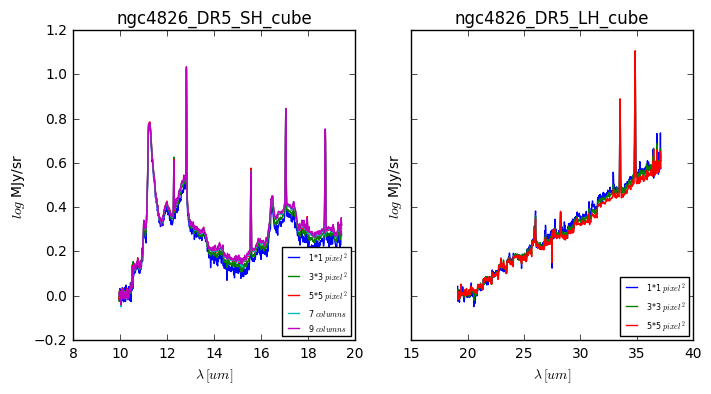

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


filename = ['ngc4826_DR5_SH_cube.fits','ngc4826_DR5_LH_cube.fits']
#filename = ['reprojectimg/LL1_on2_LL2.fits','reprojectimg/LL2_on2_LL2.fits',
#            'reprojectimg/SL1_on2_LL2.fits','reprojectimg/SL2_on2_LL2.fits',
#            'reprojectimg/LH_on2_LL2.fits','reprojectimg/SH_on2_LL2.fits']

#plt.figure(figsize=[20,5])
f, ax = plt.subplots(1, len(filename), figsize=[4*len(filename),4], sharey = True)
            
for num in range(0,len(filename)):
    cube = fits.open(filename[num])
    cube.info()

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
    flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
    flux_sum = flux.sum(axis=2)
    flux_sum[np.isnan(flux_sum)] = 0
    mm = flux_sum.shape
#    nn = np.argmax(flux_sum)
#    xx = (nn)//mm[1]
#    yy = (nn)%mm[1]
    xx, yy = np.where(flux_sum == np.max(flux_sum))
#    print(flux_sum[xx,yy],np.max(flux_sum))
#    print(xx,yy)
   
    wave = cube['WCS-TAB'].data[0][0]
    wave.resize(len(wave))

    flux_header = cube['PRIMARY'].header
    
#    plt.figure(figsize=[10,5])

    n = np.min([xx[0],yy[0],mm[0]-xx[0],mm[1]-yy[0]])+1
#    print(n)
    for i in range(0,n):
        flux_part = flux[xx[0]-i:xx[0]+1+i,yy[0]-i:yy[0]+1+i]
        flux_part = flux_part.mean(axis=(0,1))
        fmean = np.mean(flux_part[1:6])
        if (fmean > 1):
            ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*i+1)+'*'+str(2*i+1)+'$\ pixel^2$')
    m = np.min([xx[0],mm[0]-xx[0]])
    if(m//5>0):
        for j in range(n,m,m//5):
            flux_part = flux[xx[0]-j:xx[0]+1+i,:]
            flux_part = flux_part.mean(axis=(0,1))
            fmean = np.mean(flux_part[1:6])
            if (fmean > 0.1):
                ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*j+1)+'$\ columns$')
    else:
        for j in range(n,m,1):
            flux_part = flux[xx[0]-j:xx[0]+1+i,:]
            flux_part = flux_part.mean(axis=(0,1))
            fmean = np.mean(flux_part[1:6])
            if (fmean > 0.1):
                ax[num].plot(wave, np.log10(flux_part/fmean),label=str(2*j+1)+'$\ columns$')

#plt.xlim(32)
#    plt.ylim(-1)
    ax[num].set_title(filename[num].split('.')[0])
    ax[num].set_xlabel('$\lambda \, [um]$')
    ax[num].set_ylabel('$log\ $'+flux_header['BUNIT'])
    ax[num].legend(loc = 4,fontsize='xx-small')
plt.show()


In [106]:
import numpy as np
from astropy.io import fits
from astropy.table import Table

filename = ['reprojectimg/SL2_on2_LL2.fits','reprojectimg/SL1_on2_LL2.fits','reprojectimg/LL2_on2_LL2.fits','reprojectimg/LL1_on2_LL2.fits']
#filename = ['ngc4826_DR5_LL2_cube.fits']

Spec = []
Wave = []
for nam in filename:
    hdu = fits.open(nam)

#print(wcs1,wcs2)
    for i in range(0,hdu[0].header['NAXIS3']):
        Spec.append(list(hdu[0].data[i]))
        col = fits.Column()
        Wave.append(list(hdu[1].data[0][0][i]))
        
Spec = np.array(Spec)
#print(Wave)
#Wave_r = Wave.view(np.recarray)

Wave_c = fits.Column(array = Wave, format = 'E')
Wave_cs = fits.BinTableHDU.from_columns(Wave_c)
#Wave_record = fits.FITS_record(vv)
#Wave_rec = fits.FITS_rec(Wave_r)

#primary_hdu = fits.PrimaryHDU(Spec, header=hdu[0].header)
#hdu_wav = fits.BinTableHDU(Wave_rec, header=None, name='WCS-TAB')
#hdul = fits.HDUList([primary_hdu, hdu[1]])
#hdul.writeto('reprojectimg/test.fits', overwrite = True)

TypeError: Input to ColDefs must be a table HDU, a list of Columns, or a record/field array.

In [226]:
c1 = fits.Column(name='a', array=np.array([[1.01], [2]]), format='E')
c2 = fits.Column(name='b', array=np.array([4.03, 5]), format='E')
c3 = fits.Column(name='c', array=np.array([7, 8.044]), format='E')
c = [c1,c3]
c.append(c2)
x = np.array([[1.0,2], [2.0,3]], dtype=[('x', float), ('y', int)])
t = fits.BinTableHDU(x)
t.writeto('reprojectimg/table2.fits')
gg = fits.open('reprojectimg/table2.fits')
print(gg[1].data[0])
gg.close()

TypeError: 'float' does not support the buffer interface

In [142]:
hdu = fits.open('reprojectimg/SL2_on2_LL2.fits')
print(type(hdu[1].data))
print(type(hdu[1].data[0]))
print(type(hdu[1].data[0][0]))
print(type(Wave_r))

<class 'astropy.io.fits.fitsrec.FITS_rec'>
<class 'astropy.io.fits.fitsrec.FITS_record'>
<class 'numpy.ndarray'>
<class 'numpy.recarray'>


In [222]:
from astropy.table import Table

t = Table([[[[1.0],[2.0]]]], names=['a'])
print(t[0][0])
x = np.array([[[[1], [2]]]], np.int32)
print(x[0][0])

[[ 1.]
 [ 2.]]
[[1]
 [2]]
